In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
import numpy as np
import pandas as pd

In [10]:
data_app = pd.read_csv('data_app.csv').values
etats_app = pd.read_csv('etats_app.csv').values.ravel()

In [18]:
data_app.shape

(199, 2)

In [11]:
etats_app

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [12]:
nb_voisin = 1
classifier_knn = KNeighborsClassifier(n_neighbors=nb_voisin)
classifier_knn.fit(data_app, etats_app)

KNeighborsClassifier(n_neighbors=1)

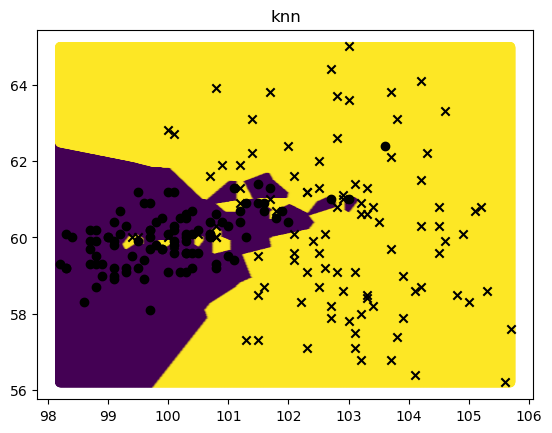

In [20]:
x1range, x2range = np.meshgrid(np.arange(data_app[:, 0].min(), data_app[:, 0].max(), 0.01),
                               np.arange(data_app[:, 1].min(), data_app[:, 1].max(), 0.01))
Xgrid = np.c_[x1range.ravel(), x2range.ravel()]
resultats_knn = classifier_knn.predict(Xgrid)

plt.figure()
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=resultats_knn, cmap='viridis')
plt.scatter(data_app[:100, 0], data_app[:100, 1], c='black', marker='o')
plt.scatter(data_app[100:, 0], data_app[100:, 1], c='black', marker='x')
plt.title('knn')
plt.show()

In [21]:
etats_app_predits = classifier_knn.predict(data_app)
resub_erreur = zero_one_loss(etats_app, etats_app_predits)
print(f"Erreur de resubstitution: {resub_erreur}")

Erreur de resubstitution: 0.005025125628140725


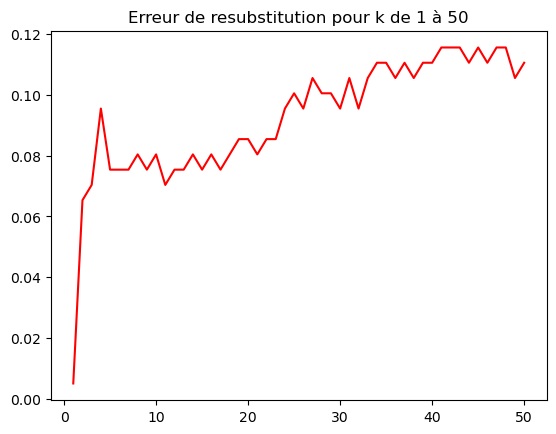

In [22]:
resub_erreurs = []
for i in range(1, 51):
    nb_voisin = i
    classifier_knn = KNeighborsClassifier(n_neighbors=nb_voisin)
    classifier_knn.fit(data_app, etats_app)
    resub_erreur_i = zero_one_loss(etats_app, classifier_knn.predict(data_app))
    resub_erreurs.append(resub_erreur_i)

plt.figure()
plt.plot(range(1, 51), resub_erreurs, '-r')
plt.title('Erreur de resubstitution pour k de 1 à 50')
plt.show()

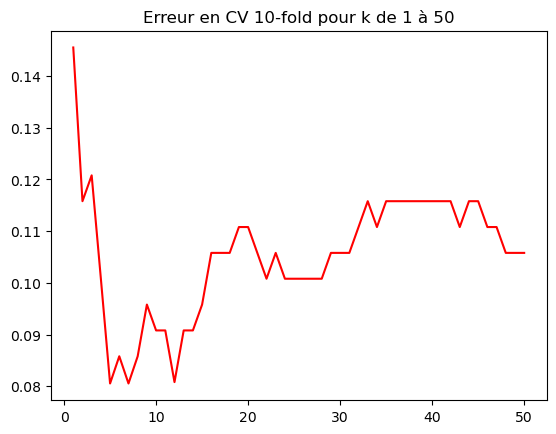

In [23]:
kloss = []
for i in range(1, 51):
    nb_voisin = i
    classifier_knn = KNeighborsClassifier(n_neighbors=nb_voisin)
    kloss_i = 1 - np.mean(cross_val_score(classifier_knn, data_app, etats_app, cv=10))
    kloss.append(kloss_i)

plt.figure()
plt.plot(range(1, 51), kloss, '-r')
plt.title('Erreur en CV 10-fold pour k de 1 à 50')
plt.show()

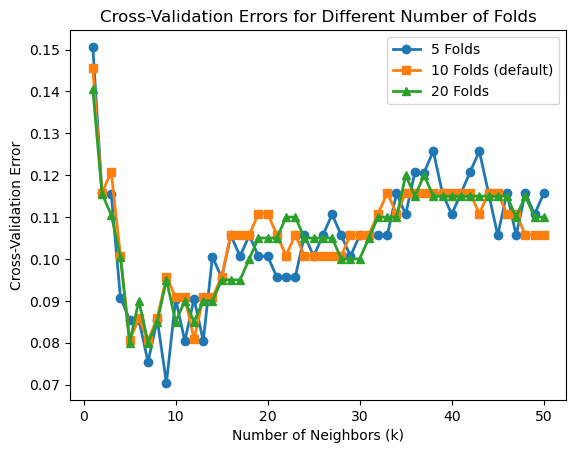

In [24]:
# Initialize vectors to store cross-validation errors
crossval_errors_5fold = np.zeros(50)
crossval_errors_20fold = np.zeros(50)

# Loop over different values of k
for k in range(1, 51):
    # Create kNN model
    classifier_knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation
    crossval_errors_5fold[k - 1] = 1 - np.mean(cross_val_score(classifier_knn, data_app, etats_app, cv=5))
    
    # Perform 20-fold cross-validation
    crossval_errors_20fold[k - 1] = 1 - np.mean(cross_val_score(classifier_knn, data_app, etats_app, cv=20))

# Plot cross-validation errors for different values of k and folds
plt.figure()
plt.plot(range(1, 51), crossval_errors_5fold, 'o-', linewidth=2, label='5 Folds')
plt.plot(range(1, 51), kloss, 's-', linewidth=2, label='10 Folds (default)')
plt.plot(range(1, 51), crossval_errors_20fold, '^-', linewidth=2, label='20 Folds')
plt.title('Cross-Validation Errors for Different Number of Folds')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Error')
plt.legend(loc='best')
plt.show()